## Some experiments on data

In [1]:
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler # normalization

In [2]:
def compute(image_name):
    #reading image
    img = cv2.imread(image_name)  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #keypoints
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img,None)
    img_1 = cv2.drawKeypoints(gray,keypoints,img)
    return img_1, keypoints, descriptors

#plt.imshow(img_1)

## DATA PROCESSING

In [3]:
cont=0

print("stampo i file all'interno della mia directory:\n")

for file in os.listdir("./image"):
    if(file!=".ipynb_checkpoints"):
        print(file)
        cont+=1

print("\nil numero delle immagini presenti è:",cont)

stampo i file all'interno della mia directory:

1_9_s.bmp
6_1_s.bmp
7_7_s.bmp
8_11_s.bmp

il numero delle immagini presenti è: 4


In [4]:
data = []
label = []
data_label = []
image_set = []
descriptors_set = []
path = "image/"
c = 0
d = 0

for file in os.listdir(path):
    if(file!=".ipynb_checkpoints"):
        source=path+file
        img=cv2.imread(source)

        if file[:1]=='1':
            im, ke, de = compute(source)
            image_set.append(im)
            descriptors_set.append(de)
            label.append("mucche")
            for j in range(0,len(de)):
                data_label.append(0)

        if file[:1]=='6':
            im, ke, de = compute(source)
            image_set.append(im)
            descriptors_set.append(de)
            label.append("faccia")
            for j in range(0,len(de)):
                data_label.append(1)

        if file[:1]=='7':
            im, ke, de = compute(source)
            image_set.append(im)
            descriptors_set.append(de)
            label.append("macchina")
            for j in range(0,len(de)):
                data_label.append(2)

        if file[:1]=='8':
            im, ke, de = compute(source)
            image_set.append(im)
            descriptors_set.append(de)
            label.append("bicicletta")
            for j in range(0,len(de)):
                data_label.append(3)

        data.append(img)
data = np.array(data)

In [5]:
print(len(image_set))
print(len(descriptors_set))
print(len(data))
print(len(label))
print(len(data_label))

4
4
4
4
2090


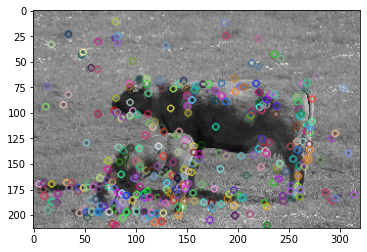

In [6]:
plt.imshow(image_set[0])

## PREPROCESSING

In [7]:
desc=np.vstack(descriptors_set)

In [8]:
np.shape(desc)

(2090, 128)

## K-Means

In [9]:
data=desc

In [10]:
scaler = MinMaxScaler()
data = scaler.fit_transform(desc)

In [11]:
np.shape(data)

(2090, 128)

In [12]:
kmeans = KMeans(100)
kmeans.fit(data)

KMeans(n_clusters=100)

In [13]:
clusters = kmeans.fit_predict(data)
clusters.shape

(2090,)

In [14]:
clusters[2089]

97

In [15]:
print(np.shape(clusters))

(2090,)


## Mapping labels

In [16]:
print(len(clusters))
print(len(data_label))

2090
2090


conto quanti cluster ho anche se lo so già

In [17]:
np.unique(clusters)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

metto a 1 le posizioni degli elementi che contengono quel particolare cluster ad esempio metto la posizione a 1
    np.where(clusters == 22,1,0) mi restituisce un array 2090  

In [18]:
index = np.where(clusters == 22,1,0)
len(index)

2090

[0 1 0 1 0 0 0 0 0 ] -> array dove 1 segna i descrittori che sono associati al cluster 22 nel mio caso
    da qui 

In [19]:
index

array([0, 0, 0, ..., 0, 0, 0])

mi conto quanti elementi ho

In [20]:
np.bincount(index)

array([2074,   16], dtype=int64)

in questo caso nel cluster 22 ho 36 elementi(descrittori) all'interno, mi salvo l'indice di ciascuno di questi descrittori

In [21]:
indices = [index1 for index1, element in enumerate(index) if element == 1]
len(indices)

16

per ogni descrittore prendo il label che gli avevo associato e lo salvo in un array

In [22]:
somma=[]

for l in indices:    
    print("indice riga del descrittore: ", l ,"----> labels associato:" , data_label[l])
    somma.append(data_label[l])

indice riga del descrittore:  85 ----> labels associato: 0
indice riga del descrittore:  89 ----> labels associato: 0
indice riga del descrittore:  90 ----> labels associato: 0
indice riga del descrittore:  98 ----> labels associato: 0
indice riga del descrittore:  248 ----> labels associato: 0
indice riga del descrittore:  288 ----> labels associato: 0
indice riga del descrittore:  327 ----> labels associato: 0
indice riga del descrittore:  528 ----> labels associato: 1
indice riga del descrittore:  1024 ----> labels associato: 2
indice riga del descrittore:  1028 ----> labels associato: 2
indice riga del descrittore:  1044 ----> labels associato: 2
indice riga del descrittore:  1357 ----> labels associato: 2
indice riga del descrittore:  1391 ----> labels associato: 2
indice riga del descrittore:  1398 ----> labels associato: 2
indice riga del descrittore:  1463 ----> labels associato: 3
indice riga del descrittore:  1566 ----> labels associato: 3


conto il label che compare maggiormente all'interno

In [23]:
np.bincount(somma).argmax()

0

mi salvo adesso in un dizionario l'indice del cluster associato, nel nostro esempio era 22, il label che è più presente all'interno


In [24]:
reference_label = {} 
num=np.bincount(somma).argmax()
reference_label[0] = num
reference_label

{0: 0}

adesso inizializzo un array avente come dimensione il numero di descrittori presenti 

In [25]:
len(clusters)

2090

In [26]:
temp_labels = np.random.rand(len(clusters))
temp_labels

array([0.51924015, 0.75859574, 0.44230642, ..., 0.1834179 , 0.32808724,
       0.90108828])

mi prendo il cluster che è associato al primo descrittore 

In [27]:
clusters[0]

52

ed utilizzo questo indice per trovarmi nel dizionario il cluster di riferimento

In [28]:
temp=0 #clusters[0]
for i in range(len(clusters)):
        temp_labels[0] = reference_label[temp]
print(temp_labels[0])

0.0


in questo caso ho preso il riferimento del label associato al cluster 0 e l'ho salvato in temp.

Quello che ottengo sono due array:

    -   temp_labels (in cui ad ogni descrittore ho il label associato dal kmeans)
    -   data_labels (in cui ho i label effettivi di ogni descrittore)
   
a questo punto vado a confrontare il label che è stato associato dal kmeans (label che compariva maggiormente nel cluster) con quello che il realtà è il label del cluster effettivo 

## FUNCTION

funzione che presi in input il numero di clusters, mi crea un dizionario dove per ogni indice del cluster mi segna il label dell'elemento che compare maggiormente al suo interno

In [29]:
reference_label = {}

def get_reference_dict(clusters,data_label):
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        indices = [index1 for index1, element in enumerate(index) if element == 1]
        somma = []
        for l in indices:
            somma.append(data_label[l])
        num=np.bincount(somma).argmax()
        reference_label[i] = num

    return reference_label

In [30]:
# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

In [31]:
reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)
from sklearn.metrics import confusion_matrix

print("accuratezza nella classificazione:", accuracy_score(predicted_labels,data_label))

#matrice 4x4 in cui avremo per ogni riga un label (predetti e reali)
print("\n",confusion_matrix(predicted_labels, data_label))

accuratezza nella classificazione: 0.4507177033492823

 [[118  51  58  76]
 [ 86 248 122 111]
 [106  79 201 106]
 [ 84 123 146 375]]


## ELBOWMETHOD

In [32]:
sse = []
list_k = [2,16,64,100,256,512,1024,2048]
for k in list_k:
    km = KMeans(n_clusters=k)
    clusters = km.fit_predict(data)
    #salvo la distanza dei punti dal cluster
    sse.append(km.inertia_)
    reference_labels = get_reference_dict(clusters,data_label)
    predicted_labels = get_labels(clusters,reference_labels)
    print(f"Accuracy for k = {k}: ", accuracy_score(predicted_labels,data_label))
    
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Accuracy for k = 2:  0.3196172248803828
Accuracy for k = 16:  0.3751196172248804
Accuracy for k = 64:  0.4296650717703349
Accuracy for k = 100:  0.45311004784688996
Accuracy for k = 256:  0.5133971291866029
Accuracy for k = 512:  0.6095693779904306
Accuracy for k = 1024:  0.761244019138756
Accuracy for k = 2048:  0.9976076555023924


ValueError: n_samples=2090 should be >= n_clusters=4096.

In [ ]:
#matrice 4x4 in cui avremo per ogni riga un label (predetti e reali)
print("\n",confusion_matrix(predicted_labels, data_label))

In [ ]:
import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(predicted_labels, data_label, labels=[0, 1, 2, 3]), 
    index=['mucche', 'faccia','macchina','bicicletta'], 
    columns=['mucche', 'faccia','macchina','bicicletta']
)
print(cmtx)